# Submission towards statistical analysis project

## Explore the customer data in the context of health insurance costs 

## Key attribute information in the data set

age​: age of primary beneficiary  
sex​: insurance contractor gender, female, male  
bmi​: Body mass index (, providing an understanding of body,  weights that are relatively high or low relative to height,  objective index of body weight (kg / m ^ 2) using the ratio of  height to weight, ideally 18.5 to 24.9 )
children​: Number of children covered by health insurance /  Number of dependents  
smoker​: Smoking  region​: the beneficiary's residential area in the US, northeast,  southeast, southwest, northwest.  
charges​: Individual medical costs billed by health insurance.  


In [1]:
#Import the data management and visualization libraries for use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
##Read the insurance cost data set downloaded locally

ins_df = pd.read_csv("insurance.csv")

#Sanity check on data read
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
##Save a copy of base data for use in case needed later without reloading
ins_df_base = ins_df.copy()

In [4]:
#Understand the data set shape and general characteristics
print("Shape of the insurance dataset :",ins_df.shape)

#There are 1338 records with 7 attributes

Shape of the insurance dataset : (1338, 7)


In [5]:
#Lets explore the data counts for each attribute and its data type
print(f"Insurance Dataset Data type and information:\n")
print(ins_df.info())

#There are no missing/null values per se in the data set (we may still need to check if the values makes sense)
#We can see a mix of numeric and categorical data types used
#Age is as expected integer while bmi and costs are floats
#sex, smoker and region are again objects having categorical values - we will move them to categorical types
#No of children/dependents can also be moved to categorical. Even though they are numbers maybe better as categorical

Insurance Dataset Data type and information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [6]:
##We observed no missing values from above but lets try another systematic way as well
print("Are there any missine values?\n",ins_df.isna().any())

#Nothing as expected

Are there any missine values?
 age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


In [7]:
#Before proceeding further..lets do some data type conversions to make it logical

#convert all object types to categorical types - we only have few categories
for col in ins_df.columns:
    if ins_df[col].dtype == "object":
        ins_df[col] = pd.Categorical(ins_df[col])
        
#Lets also convert children to categorical as it makes logical sense
ins_df["children"] = pd.Categorical(ins_df["children"])

In [8]:
#Check again the new data types
ins_df.info()

#All updates are complete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null category
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(4), float64(2), int64(1)
memory usage: 37.2 KB


In [9]:
##Lets do a describe to check the distribution and 5 point summary of the numeric attributes
ins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
#Lets check the IQR for all these columns
print("IQR for Age, bmi and charges :\n")
print(ins_df.quantile(0.75) - ins_df.quantile(0.25))

IQR for Age, bmi and charges :

age           24.000000
bmi            8.397500
charges    11899.625365
dtype: float64


In [11]:
#Age and bmi seem to be almost a normal distribution since mean and median are almost same
#charges are right skewed since mean is greater than median
#Lets deep dive and check each attribute

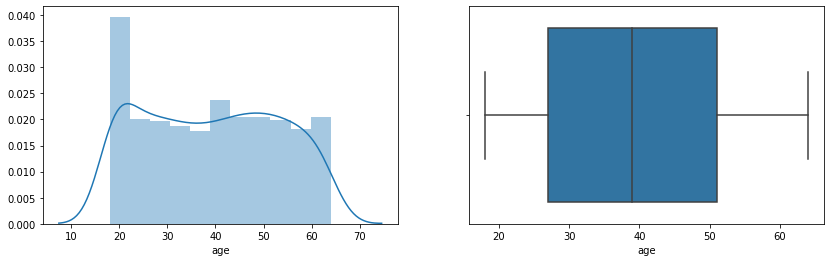

In [11]:
##We can visualize the same using box plots and distribution plots
#Age 
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

sns.distplot(ins_df["age"],ax=ax1)
sns.boxplot(ins_df["age"],ax=ax2)

#As expected age is almost a normal distribution with no obvious outliers 
#and a slight right skew with very flat kurtosis indicating lot of people spread uniformly in the mid range
#We can also see that there are lot more people in the age group 18-20 than others which corresponds to the mode
#There is no outlier in the data set..

In [12]:
#Skewness and kurtosis - lets get the values to see validation our observations
     
print(f'Skew of Age distribution is {ins_df["age"].skew() :.3f}')
print(f'Kurtosis of Age distribution is {ins_df["age"].kurt() : .3f}')
      
#Expected range of values as seen in the plots

Skew of Age distribution is 0.056
Kurtosis of Age distribution is -1.245


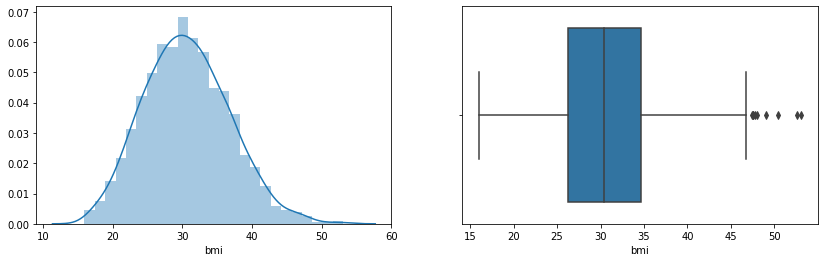

In [13]:
#bmi attribute charactersitics
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

sns.distplot(ins_df["bmi"],ax=ax1)
sns.boxplot(ins_df["bmi"],ax=ax2)

#the bmi values have very symetrical and almost normal distribution. 
#we can however see several outliers in the bmi values

In [14]:
#Skewness and kurtosis - lets get the values to see validation our observations
     
print(f'Skew of bmi distribution is {ins_df["bmi"].skew() :.3f}')
print(f'Kurtosis of bmi distribution is {ins_df["bmi"].kurt() : .3f}')
      
#Expected values based on the plot observations

Skew of bmi distribution is 0.284
Kurtosis of bmi distribution is -0.051


In [15]:
#Lets check the outliers based on bmi
Q1 = ins_df["bmi"].quantile(0.25)
Q3 = ins_df["bmi"].quantile(0.75)
IQR = Q3 - Q1

print(ins_df[(ins_df["bmi"] < (Q1 - 1.5 * IQR)) | (ins_df["bmi"] > (Q3 +  1.5 * IQR))])

#9 records -(interstingly mostly southeast)

      age     sex    bmi children smoker     region      charges
116    58    male  49.06        0     no  southeast  11381.32540
286    46  female  48.07        2     no  northeast   9432.92530
401    47    male  47.52        1     no  southeast   8083.91980
543    54  female  47.41        0    yes  southeast  63770.42801
847    23    male  50.38        1     no  southeast   2438.05520
860    37  female  47.60        2    yes  southwest  46113.51100
1047   22    male  52.58        1    yes  southeast  44501.39820
1088   52    male  47.74        1     no  southeast   9748.91060
1317   18    male  53.13        0     no  southeast   1163.46270


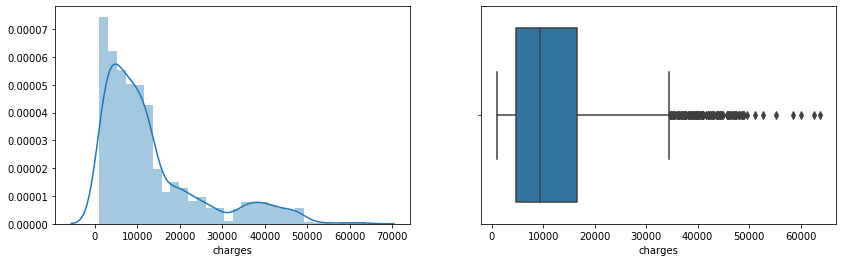

In [16]:
#Charges distribution and analysis
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

sns.distplot(ins_df["charges"],ax=ax1)
sns.boxplot(ins_df["charges"],ax=ax2)

#As expected the distribution is right skewed with lot of outliers which is probably normal when it comes to charges

In [17]:
#Skewness and kurtosis - lets get the values to see validation our observations
     
print(f'Skew of charges distribution is {ins_df["charges"].skew() :.3f}')
print(f'Kurtosis of charges distribution is {ins_df["charges"].kurt() : .3f}')
      
#Again expected values based on plots

Skew of charges distribution is 1.516
Kurtosis of charges distribution is  1.606


In [18]:
#Lets check the outliers based on charges
Q1 = ins_df["charges"].quantile(0.25)
Q3 = ins_df["charges"].quantile(0.75)
IQR = Q3 - Q1

print(ins_df[(ins_df["charges"] < (Q1 - 1.5 * IQR)) | (ins_df["charges"] > (Q3 +  1.5 * IQR))])

#There are 139 records which are outliers as seen in the plots (almost 10% of the overall data.)
#We may have to explore these seperately to check any patterns

      age     sex     bmi children smoker     region      charges
14     27    male  42.130        0    yes  southeast  39611.75770
19     30    male  35.300        0    yes  southwest  36837.46700
23     34  female  31.920        1    yes  northeast  37701.87680
29     31    male  36.300        2    yes  southwest  38711.00000
30     22    male  35.600        0    yes  southwest  35585.57600
34     28    male  36.400        1    yes  southwest  51194.55914
38     35    male  36.670        1    yes  northeast  39774.27630
39     60    male  39.900        0    yes  southwest  48173.36100
49     36    male  35.200        1    yes  southeast  38709.17600
53     36    male  34.430        0    yes  southeast  37742.57570
55     58    male  36.955        2    yes  northwest  47496.49445
82     22    male  37.620        1    yes  southeast  37165.16380
84     37  female  34.800        2    yes  southwest  39836.51900
86     57  female  31.160        0    yes  northwest  43578.93940
94     64 

In [19]:
##Lets check how the categorical attributes are distributed


Gender Value distribution :

male      676
female    662
Name: sex, dtype: int64


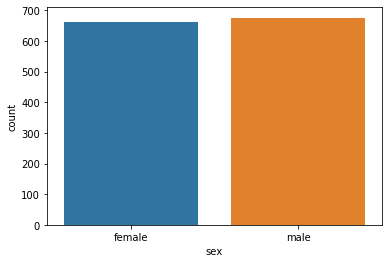

In [20]:
#Lets check the gender column
print("Gender Value distribution :\n")
print(ins_df["sex"].value_counts())

#visualize
sns.countplot(ins_df["sex"])


#Almost an equal representation of the data across gender

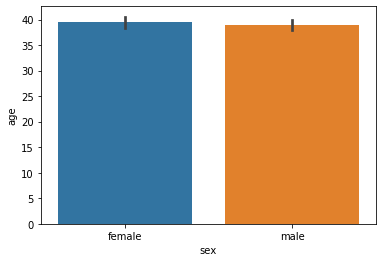

In [21]:
#Checking the distribution across age
sns.barplot(x="sex",y="age",data=ins_df)

#Seems to be uniform

Children Value distribution :

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


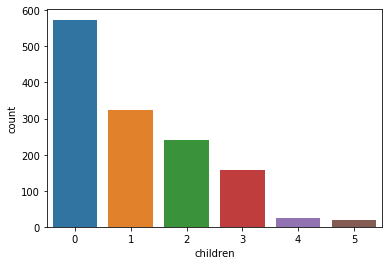

In [22]:
#Lets check the children column
print("Children Value distribution :\n")
print(ins_df["children"].value_counts())

#visualize
sns.countplot(ins_df["children"])


#This is probably expected in general population and reflects in the data set

Smoker distribution :

no     1064
yes     274
Name: smoker, dtype: int64


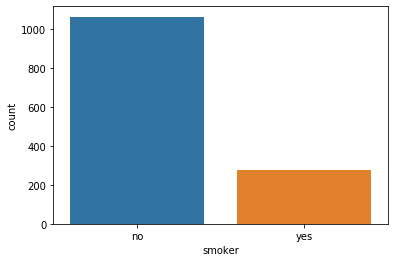

In [23]:
#Lets check the smoker column
print("Smoker distribution :\n")
print(ins_df["smoker"].value_counts())

#visualize
sns.countplot(ins_df["smoker"])

#Lot less smokers than non-smokers

Region wise distribution :

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


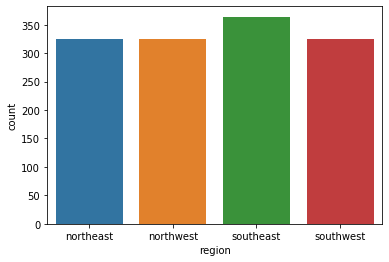

In [24]:
#Lets check the region column
print("Region wise distribution :\n")
print(ins_df["region"].value_counts())

#visualize
sns.countplot(ins_df["region"])

#Data is pulled almost equally from all the regions

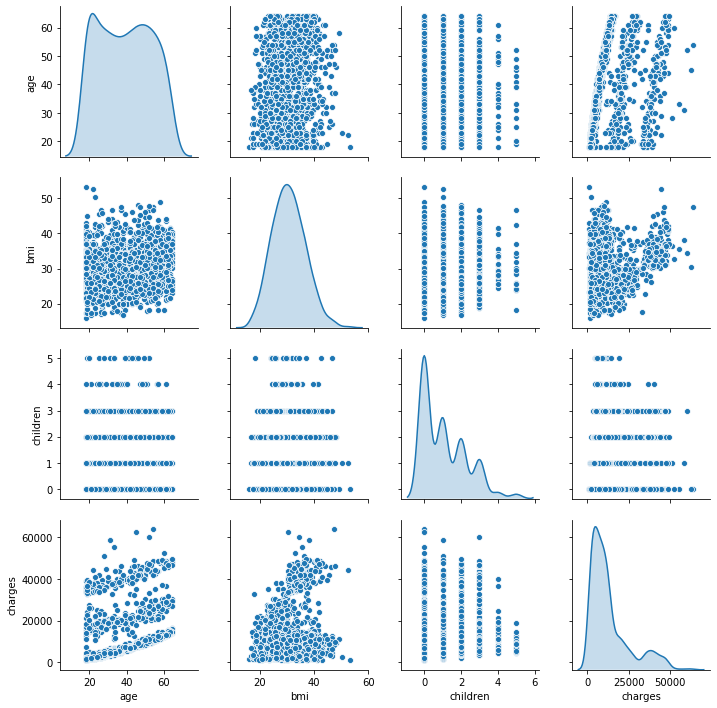

In [25]:
#Lets see the relationship among all the attributes
sns.pairplot(ins_df,diag_kind="kde")

#We can see that the bmi range is similar across age groups mostly
#We can see a very gradual increase clearly in the charges with respect to age
#The charges seem to be having three clusters among themselves
#Sex, Smoker and region do not show up in this pairplot as they categorical. 
#We will need to encode them to get in this view. We will try that below

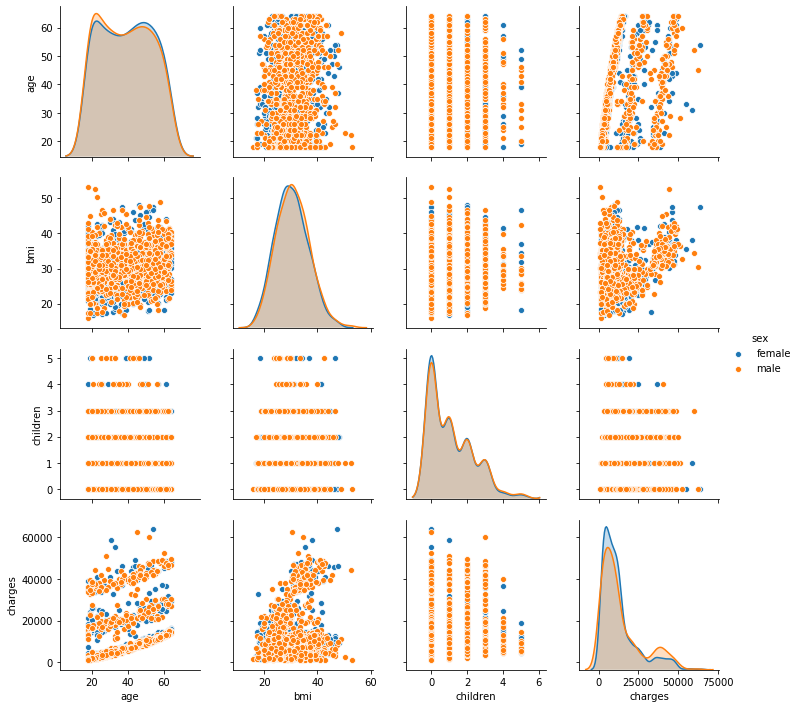

In [26]:
#See how this is distributed based on gender

sns.pairplot(ins_df,hue="sex")

#Very interesting to note that all the attributes kind of have similar distributions in both genders


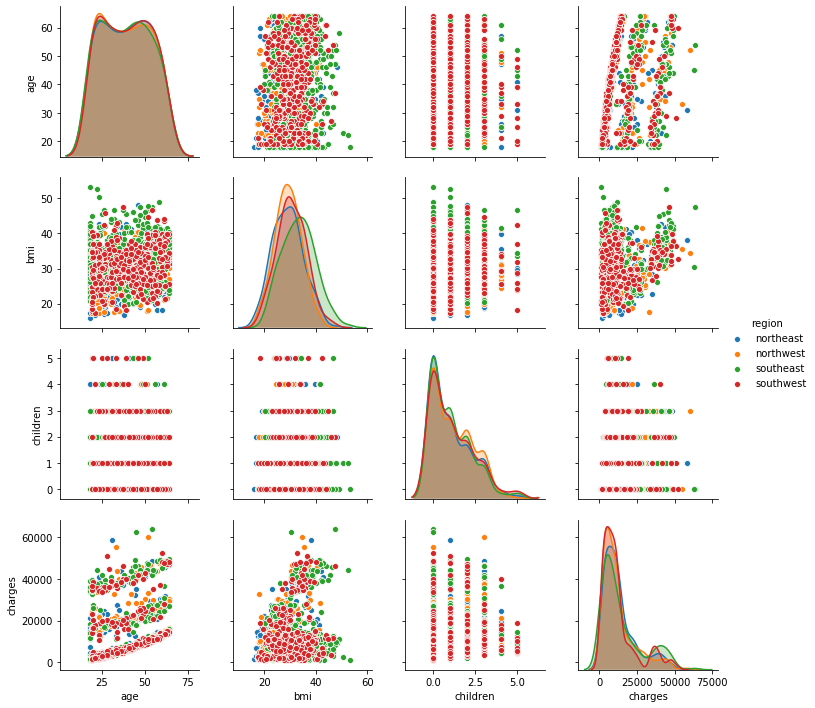

In [27]:
#See how this is distributed based on region

sns.pairplot(ins_df,hue="region")

#Again as expected they are similar across regions

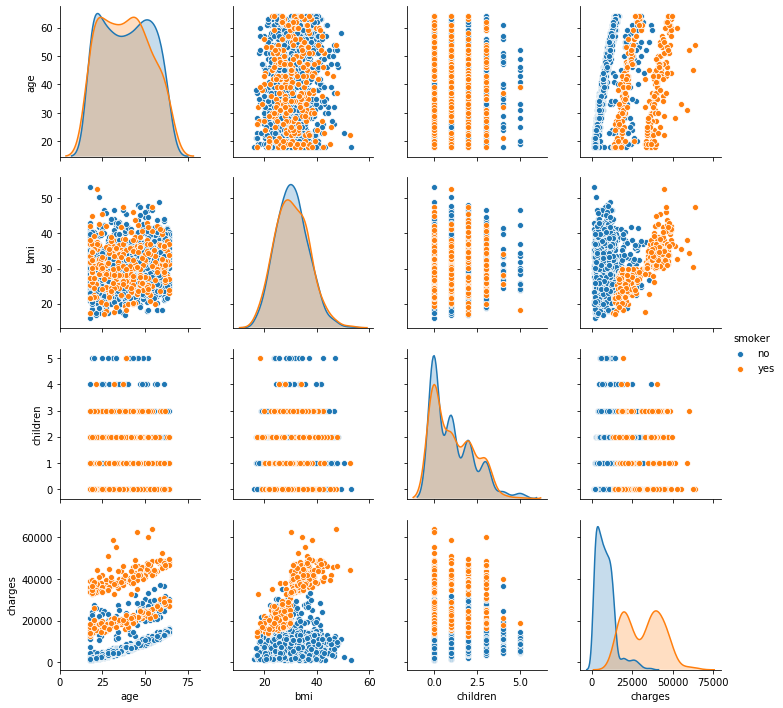

In [28]:
#See how this is distributed based on smoker

sns.pairplot(ins_df,hue="smoker")

#We can see a clear difference in the charges for smokers and non smokers

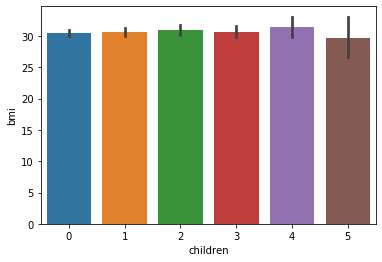

In [29]:
#Visualizing the relation with children
sns.barplot(x="children",y="bmi",data=ins_df)

#Seems kind of equal

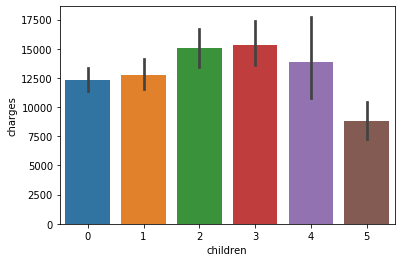

In [30]:
#Visualizing the relation with children
sns.barplot(x="children",y="charges",data=ins_df)

#We can see it increases from 2 to 3 and then kind of drops 

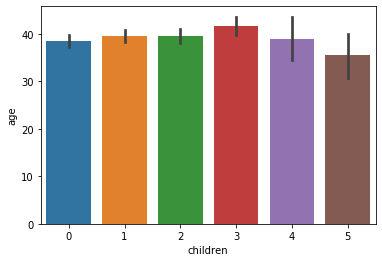

In [32]:
#Visualizing the relation with children
sns.barplot(x="children",y="age",data=ins_df)

#Nothing very significantly different

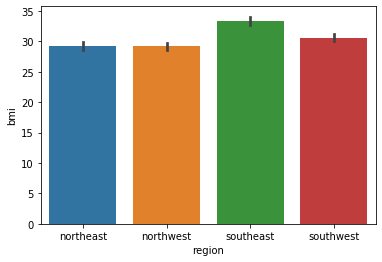

In [33]:
#Visualizing with respect to region
sns.barplot(x="region",y="bmi",data=ins_df)

#Seems kind of equal with south east little higer. We could probably remove the outliers and go on

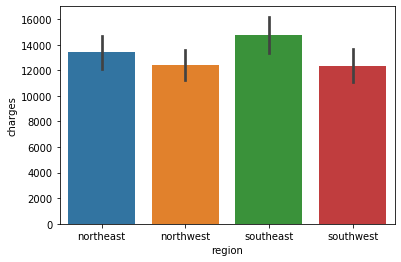

In [34]:
#Visualizing with respect to region
sns.barplot(x="region",y="charges",data=ins_df)


#Seems kind of equal except southeast which had outliers as well

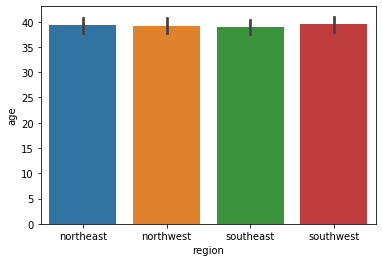

In [35]:
#Visualizing with respect to region
sns.barplot(x="region",y="age",data=ins_df)

#Similar across regions

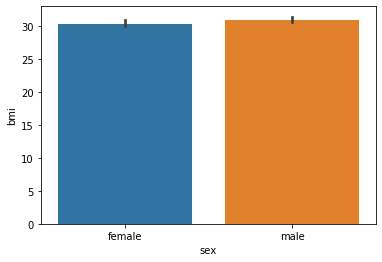

In [36]:
#Visualizing the relation with gender
sns.barplot(x="sex",y="bmi",data=ins_df)

#Very similar

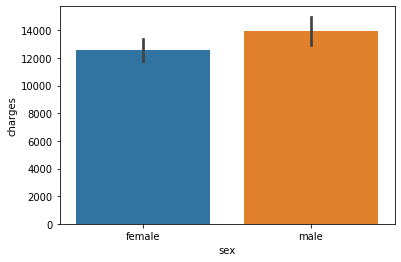

In [37]:
#Visualizing the relation with gender
sns.barplot(x="sex",y="charges",data=ins_df)

#Male charges are slightly higher

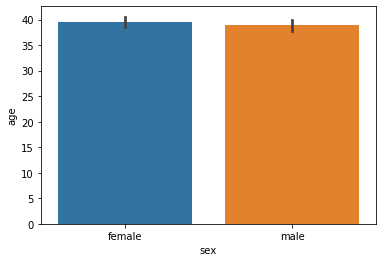

In [38]:
#Visualizing the relation with gender
sns.barplot(x="sex",y="age",data=ins_df)

#Very similar

In [39]:
#We will use LabelEncoder for encoding categorical features
from sklearn.preprocessing import LabelEncoder

In [40]:
#Take a copy without touching the other DF
ins_df_encoded = ins_df_base.copy()

#Check the current datatypes
ins_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [41]:
#Encode the categorical attributes using LabelEncoder

le = LabelEncoder()

for c in ins_df_encoded.columns:
    if ins_df_encoded[c].dtype == "object":
        ins_df_encoded[c] = le.fit_transform(ins_df_encoded[c])

#Check the data type changes are reflecting
ins_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int32
region      1338 non-null int32
charges     1338 non-null float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


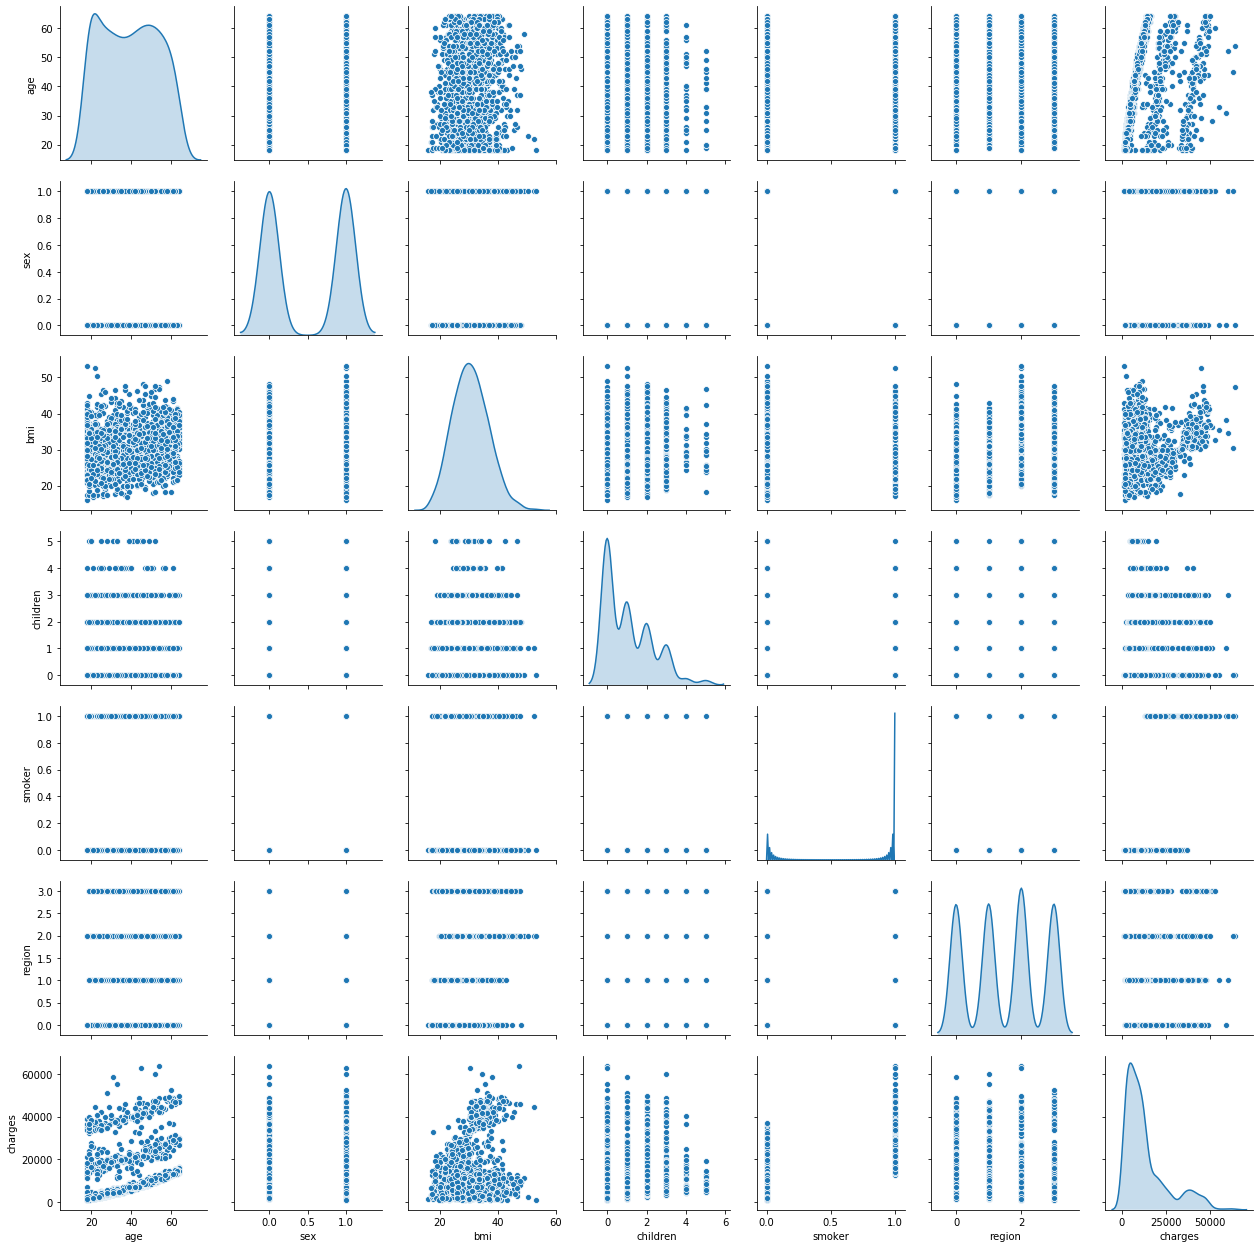

In [42]:
#Generate a pairplot to see all the features in one plot
sns.pairplot(ins_df_encoded, diag_kind="kde")

#Some additional observations from this pairplot
#We can see the charges are more for smokers (we will validate that using a boxplot below)
#Also validates the observations of the individual plots from above
#Note - categorical variables should ideally be used with hue to distinguish than scatter plot

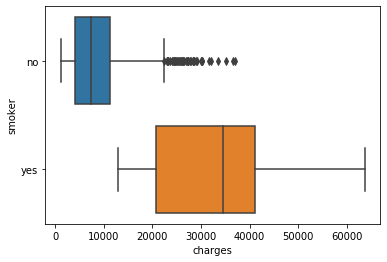

In [43]:
##Checking charges with respect to smoking using boxplot to conform the observation from pairplot
sns.boxplot(x=ins_df["charges"],y=ins_df["smoker"])

#Generally the charges are lower for non-smokers in the data set

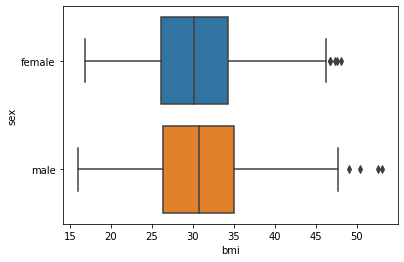

In [44]:
##Checking the bmi distribution with respect to male and female
sns.boxplot(x=ins_df["bmi"],y=ins_df['sex'])

#There does not seem to be too much difference

In [45]:
##Lets check the correlation among the attributes
#We will use the non encoded version to check the relation among numeric features
ins_df.corr()

#Not very correlated..even though a very slight correlation in age and charges is seen

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


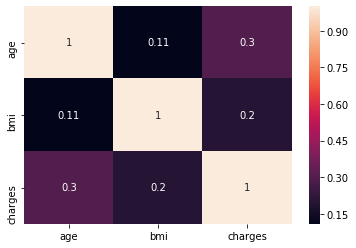

In [46]:
#Visualize the same using heatmap
sns.heatmap(ins_df.corr(),annot=True)

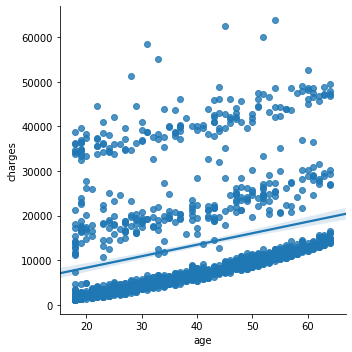

In [47]:
#Check the relation b/w age and charges once again using lmplot
sns.lmplot(x="age",y="charges",data=ins_df)

#Shows the very feeble correlation clearly

## Using statistical tests answer the below questions

In [48]:
#Import the stats packages
import scipy.stats as stats

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

from scipy.stats import f_oneway

### Q1 - Do charges of people who smoke differ significantly  from the people who don't?  

In [49]:
#We observed this from pairplot and box plot. Lets see how the tests come up

#Get the charges data for smokers and non-smokers

smoker_charges = ins_df[ins_df["smoker"] == "yes"]["charges"]
non_smoker_charges = ins_df[ins_df["smoker"] == "no"]["charges"]

#sanity check
print("smoking \n",smoker_charges.head(5))
print("Non smoking \n",non_smoker_charges.head(5))

smoking 
 0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64
Non smoking 
 1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64


In [50]:
##Check for normality
#This is only for testing and learning. Since the samples are more than usual guidline of 30 we should be fine
#import shapiro from scipy stats
from scipy.stats import shapiro

#Shapiro test has a null hypothesis that the samples are from populations oare normaly distributed (from scipy doc)
#Assuming standard significance value
alpha=0.05

W, p_value = shapiro(smoker_charges)

print("Shapiro test results for smoker samples")
print(f'W_stat : {W} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance. \
    \nThe samples are not from normal distribution and hence t test results may not be accurate")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nThe samples are from normal and satisfies this assumption for t tests")

print("\n")
W, p_value = shapiro(non_smoker_charges)

print("Shapiro test results for non smoker samples")
print(f'W_stat : {W} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance. \
    \nThe samples are not from normal distribution and hence t test results may not be accurate")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nThe samples are from normal and satisfies this assumption for t tests")

Shapiro test results for smoker samples
W_stat : 0.9395521879196167 
p_value : 3.6251879276250065e-09
Since p-value is less than the significance value decision is to reject the null hypothesis at 5.0% level of significance.     
The samples are not from normal distribution and hence t test results may not be accurate


Shapiro test results for non smoker samples
W_stat : 0.8728628158569336 
p_value : 1.4455900162299346e-28
Since p-value is less than the significance value decision is to reject the null hypothesis at 5.0% level of significance.     
The samples are not from normal distribution and hence t test results may not be accurate


In [51]:
#Performing Levene test to ensure the samples are from populations of equal variance which is one of the assumptions
##for t tests

#import levene from scipy stats
from scipy.stats import levene

#Levenes test has a null hypothesis that the samples are from populations of equal variance (from scipy doc)
#Assuming standard significance value
alpha=0.05

W, p_value = levene(smoker_charges,non_smoker_charges)

print("Levene test results for samples")
print(f'W_stat : {W} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance. \
    \nThe samples are not from populations with equal variances and hence t test results may not be accurate")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nThe samples are from populations with equal variances and satisfies this assumption for t tests")

Levene test results for samples
W_stat : 332.6135162726081 
p_value : 1.5593284881803726e-66
Since p-value is less than the significance value decision is to reject the null hypothesis at 5.0% level of significance.     
The samples are not from populations with equal variances and hence t test results may not be accurate


In [52]:
##Step 1: We will formulate our hypothesis as below

#Ho : mean of charges for smokers = mean of charges for non smokers
#Hi : mean of charges for smokers != mean of charges for non smokers

#Step 2: Lets assume significance level as standard 5%
alpha = 0.05

#Step 3: We will use two sample independent t test since population mean is not known and it is assumed 
#that samples are random, independent, parametric & normally distributed (since sample size is large enough this is ok)
     
##Step 4: Find t statistics and p-value using ttest_ind for 2 sample independent t test
#Setting equal_variance as False based on Levenne test
t_stat, p_value = ttest_ind(smoker_charges,non_smoker_charges,equal_var=False)
print("Two Sample Independent t test results")
print(f't_stat : {t_stat} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance.\
    \nThere is significant difference in the data sets")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nThere is no significant difference in the data sets")

Two Sample Independent t test results
t_stat : 32.751887766341824 
p_value : 5.88946444671698e-103
Since p-value is less than the significance value decision is to reject the null hypothesis at 5.0% level of significance.    
There is significant difference in the data sets


In [53]:
#This is validated by the box plot aboves in the EDA section

##  Q2 - Does bmi of males differ significantly from that of  females?  

In [54]:
#Get the bmi data for males and females

male_bmi = ins_df[ins_df["sex"] == "male"]["bmi"]
female_bmi= ins_df[ins_df["sex"] == "female"]["bmi"]

#sanity check
print("Male BMI \n",male_bmi.head(5))
print("Female BMI\n",female_bmi.head(5))

Male BMI 
 1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64
Female BMI
 0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64


In [55]:
#Performing Levene test to ensure the samples are from populations of equal variance which is one of the assumptions
##for t tests

#import levene from scipy stats
from scipy.stats import levene

#Levenes test has a null hypothesis that the samples are from populations of equal variance (from scipy doc)
#Assuming standard significance value
alpha=0.05

W, p_value = levene(male_bmi,female_bmi)

print("Levene test results for samples")
print(f'W_stat : {W} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance. \
    \nThe samples are not from populations with equal variances and hence t test results may not be accurate")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nThe samples are from populations with equal variances and satisfies this assumption for t tests")

Levene test results for samples
W_stat : 0.0039394029791134 
p_value : 0.949963293424026
Since p-value is not less than the significance value decision is to not reject the null hypothesis at 5.0% level of significance.    
The samples are from populations with equal variances and satisfies this assumption for t tests


In [56]:
##Step 1: We will formulate our hypothesis as below

#Ho : mean of bmi for males = mean of bmi for female
#Hi : mean of bmi for males != mean of bmi for female

#Step 2: Lets assume significance level as standard 5%
alpha = 0.05

#Step 3: We will use two sample independent t test since population mean is not known and it is assumed 
#that samples are random, independent, parametric & normally distributed
     
##Step 4: Find t statistics and p-value using ttest_ind for 2 sample independent t test
t_stat, p_value = ttest_ind(male_bmi,female_bmi,equal_var=True)
print("Two Sample Independent t test results")
print(f't_stat : {t_stat} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance.\
    \nThere is significant difference in the data sets")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nThere is no significant difference in the data sets")

Two Sample Independent t test results
t_stat : 1.696752635752224 
p_value : 0.08997637178984932
Since p-value is not less than the significance value decision is to not reject the null hypothesis at 5.0% level of significance.    
There is no significant difference in the data sets


In [57]:
#This observation again is validated by the box plot above

## Q3 - Is the proportion of smokers significantly different  in different genders?  

In [58]:
#Get the Gender and Smoker data seperately into a frequency table

smoker_gender = pd.crosstab(ins_df["sex"],ins_df["smoker"])

#sanity check
smoker_gender



smoker,no,yes
sex,,
female,547,115
male,517,159


In [59]:
##Step 1: We will formulate our hypothesis as below

#Ho : The observed proportion of smokers are independent of the gender
#Hi : There is some dependency among the proportion of smokers and gender

#Step 2: Significance level as 5% 
alpha = 0.05

#Step 3: We will use chi2_contingency test to check the independence of the proportions


##Step 4: Find chi2_contingency stats

chi_sq_Stat, p_value, deg_freedom, exp_freq = chi2_contingency(smoker_gender)
print("Chi Contingency test results")
print(f'chi2_stat : {chi_sq_Stat} \np_value : {p_value} \ndegree of freedom : {deg_freedom} \nContingency Table : \n{exp_freq}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance.\
    \nWe can conclude that there is some dependency between the observations")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nIn other words, the dice roll results are independent")

Chi Contingency test results
chi2_stat : 7.39291081459996 
p_value : 0.006548143503580696 
degree of freedom : 1 
Contingency Table : 
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]
Since p-value is less than the significance value decision is to reject the null hypothesis at 5.0% level of significance.    
We can conclude that there is some dependency between the observations


smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


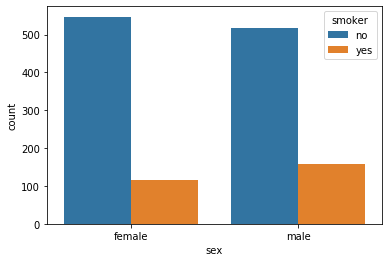

In [60]:
#Visualize the data and see it is makes sense
sns.countplot(x='sex',data=ins_df,hue="smoker")

#There could be a influence
pd.crosstab(ins_df["sex"],ins_df["smoker"],margins=True)


## Q4 - Is the distribution of bmi across women with no  children, one child and two children, the same ?

In [61]:
#Lets check the visualization

#get the bmi data for women with children 0,1,2

bmi_df = ins_df[(ins_df['children'].isin([0,1,2])) & (ins_df['sex'] == 'female')]

#sanity check
print(bmi_df.sample(5))



      age     sex     bmi children smoker     region      charges
1306   29  female  21.850        0    yes  northeast  16115.30450
798    58  female  33.100        0     no  southwest  11848.14100
527    51  female  25.800        1     no  southwest   9861.02500
342    60  female  27.550        0     no  northeast  13217.09450
1016   19  female  24.605        1     no  northwest   2709.24395


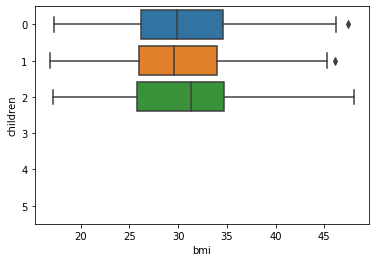

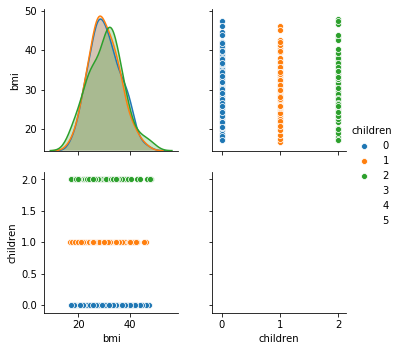

In [62]:
#Visualize the data and check

sns.boxplot(x=bmi_df["bmi"],y=bmi_df["children"])

sns.pairplot(bmi_df[["bmi","children"]],hue="children")

#distribution seems very similar among the zero and one child but slightly different with 2 children
#is this statistically significant?

In [63]:
#Get the bmi data across for women across children
bmi_female_no_children = bmi_df[bmi_df["children"] == 0]["bmi"]
bmi_female_one_children = bmi_df[bmi_df["children"] == 1]["bmi"]
bmi_female_two_children = bmi_df[bmi_df["children"] == 2]["bmi"]

#sanity check
print(bmi_female_no_children.sample(2))
print(bmi_female_one_children.sample(2))
print(bmi_female_two_children.sample(2))

473     33.345
1223    24.420
Name: bmi, dtype: float64
1076    32.00
469     24.09
Name: bmi, dtype: float64
1213    33.300
712     30.685
Name: bmi, dtype: float64


In [64]:
#Performing Levene test to ensure the samples are from populations of equal variance which is one of the assumptions
##for ANOVA tests

#import levene from scipy stats
from scipy.stats import levene

#Levenes test has a null hypothesis that the samples are from populations of equal variance (from scipy doc)
#Assuming standard significance value
alpha=0.05

W, p_value = levene(bmi_female_no_children,bmi_female_one_children,bmi_female_two_children)

print("Levene test results for samples")
print(f'W_stat : {W} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance. \
    \nThe samples are not from populations with equal variances and hence ANOVA test results may not be accurate")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nThe samples are from populations with equal variances and satisfies this assumption for ANOVA tests")

Levene test results for samples
W_stat : 0.9433311607108589 
p_value : 0.3899432394522804
Since p-value is not less than the significance value decision is to not reject the null hypothesis at 5.0% level of significance.    
The samples are from populations with equal variances and satisfies this assumption for ANOVA tests


In [65]:
##Step 1: We will formulate our hypothesis as below

#Ho : Mean of the bmi across the three groups are same
#Hi : At least one mean is different

#Step 2: Lets assume significance level as standard 5%
alpha = 0.05

#Step 3: We will use one way ANOVA test since it is assumed that samples are random, independent, 
#parametric & normally distributed. We have already proved using Levenes test that the variances of the populations
#of the samples are equal thereby satifying the assumptions for depending on ANOVA tests


##Step 4: Find f_stat and p-value using f_oneway for the samples
f_stat, p_value = f_oneway(bmi_female_no_children,bmi_female_one_children,bmi_female_two_children)
print("One way ANOVA test results")
print(f'f_stat : {f_stat} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance.\
    \nIn other words, at least one of the means of the populations of the samples is different")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nWe can conclude that the means of the populations of the the samples are equal")

One way ANOVA test results
f_stat : 0.3344720147757968 
p_value : 0.7158579926754841
Since p-value is not less than the significance value decision is to not reject the null hypothesis at 5.0% level of significance.    
We can conclude that the means of the populations of the the samples are equal


In [66]:
##Check for same distribution using ks test to compare two distributions

#import ks test
from scipy.stats import ks_2samp

In [67]:
##Step 1: We will formulate our hypothesis as below

#Ho : The distributions of the two samples are same
#Hi : At least one distribution is different

#Step 2: Lets assume significance level as standard 5%
alpha = 0.05

#Step 3: We will use KS 2 sample test to check the similarity

##Step 4: Find f_stat and p-value using ks_2samp for the samples
#We will need to do this pairwise since there is no multisample version
#Check between zero and one
D_stat, p_value = ks_2samp(bmi_female_no_children,bmi_female_one_children)
print("Two Sample KS test results - First Pair")
print(f'D_stat : {D_stat} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance.\
    \nIn other words, the samples do not have the same distribution")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nWe can conclude that the distributions are similar")
    
#Check between zero and two
print("\n\n")
D_stat, p_value = ks_2samp(bmi_female_no_children,bmi_female_two_children)
print("Two Sample KS test results - Second Pair")
print(f'D_stat : {D_stat} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance.\
    \nIn other words, the samples do not have the same distribution")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nWe can conclude that the distributions are similar")
    
#Check between one and two
print("\n\n")
D_stat, p_value = ks_2samp(bmi_female_one_children,bmi_female_two_children)
print("Two Sample KS test results - Third Pair")
print(f'D_stat : {D_stat} \np_value : {p_value}')

##Step 5: Check if p-value less than significance level decided
if p_value < alpha:
    print(f"Since p-value is less than the significance value decision is to reject the null hypothesis at {alpha*100}% level of significance.\
    \nIn other words, the samples do not have the same distribution")
else:
    print(f"Since p-value is not less than the significance value decision is to not reject the null hypothesis at {alpha*100}% level of significance.\
    \nWe can conclude that the distributions are similar")
    

Two Sample KS test results - First Pair
D_stat : 0.05326091717401771 
p_value : 0.9274771791082741
Since p-value is not less than the significance value decision is to not reject the null hypothesis at 5.0% level of significance.    
We can conclude that the distributions are similar



Two Sample KS test results - Second Pair
D_stat : 0.10479485912011866 
p_value : 0.296668106507649
Since p-value is not less than the significance value decision is to not reject the null hypothesis at 5.0% level of significance.    
We can conclude that the distributions are similar



Two Sample KS test results - Third Pair
D_stat : 0.10929688331028609 
p_value : 0.3722939478383565
Since p-value is not less than the significance value decision is to not reject the null hypothesis at 5.0% level of significance.    
We can conclude that the distributions are similar


In [68]:
##Statistically the distributions are similar at 5% significance level